# Кластеризация

На прошлой лекции мы начали знакомиться с задачами Unsupervised Learning и поговорили о задаче снижения размерности. Сегодня мы продолжим изучение задач обучения без учителя и поговорим о задаче **кластеризации**.

Что такое кластеризация?
Кластеризация - это разделение исходного набора **неразмеченных** данных на несколько групп, которые называются кластерами. Кластер - довольно нестрогое понятие. Отличительным признаком кластера можно считать следующее утверждение:

"Среднее расстояние между объектами кластера существенно меньше, чем среднее расстояние между парами объектов, один из которых принадлежит кластеру, а другой - нет".

Поставим эту задачу формально.
_____________________________________
**Дано:**

Пусть $X$ - это пространство объектов, из которых мы набираем обучающую выборку.

$X^N$ = $\{x^i\}_{i=1}^N$- обучающая выборка. Еще раз обратим внимание на то, что в выборке отсутствуют метки $y$.

$\rho: X × X → [0,∞)$ - функция расстояния между объектами.

Заметим, что функция расстояния, как и в случае с метрическими алгоритмами, отражает наши ожидания от понятия "близость объектов".

**Найти:**

$y_i \in Y$ - метки принадлежности кластерам объектов. Требования к ним:

* Каждый кластер состоит из близких объектов.
* Объекты разных кластеров далеки друг от друга.

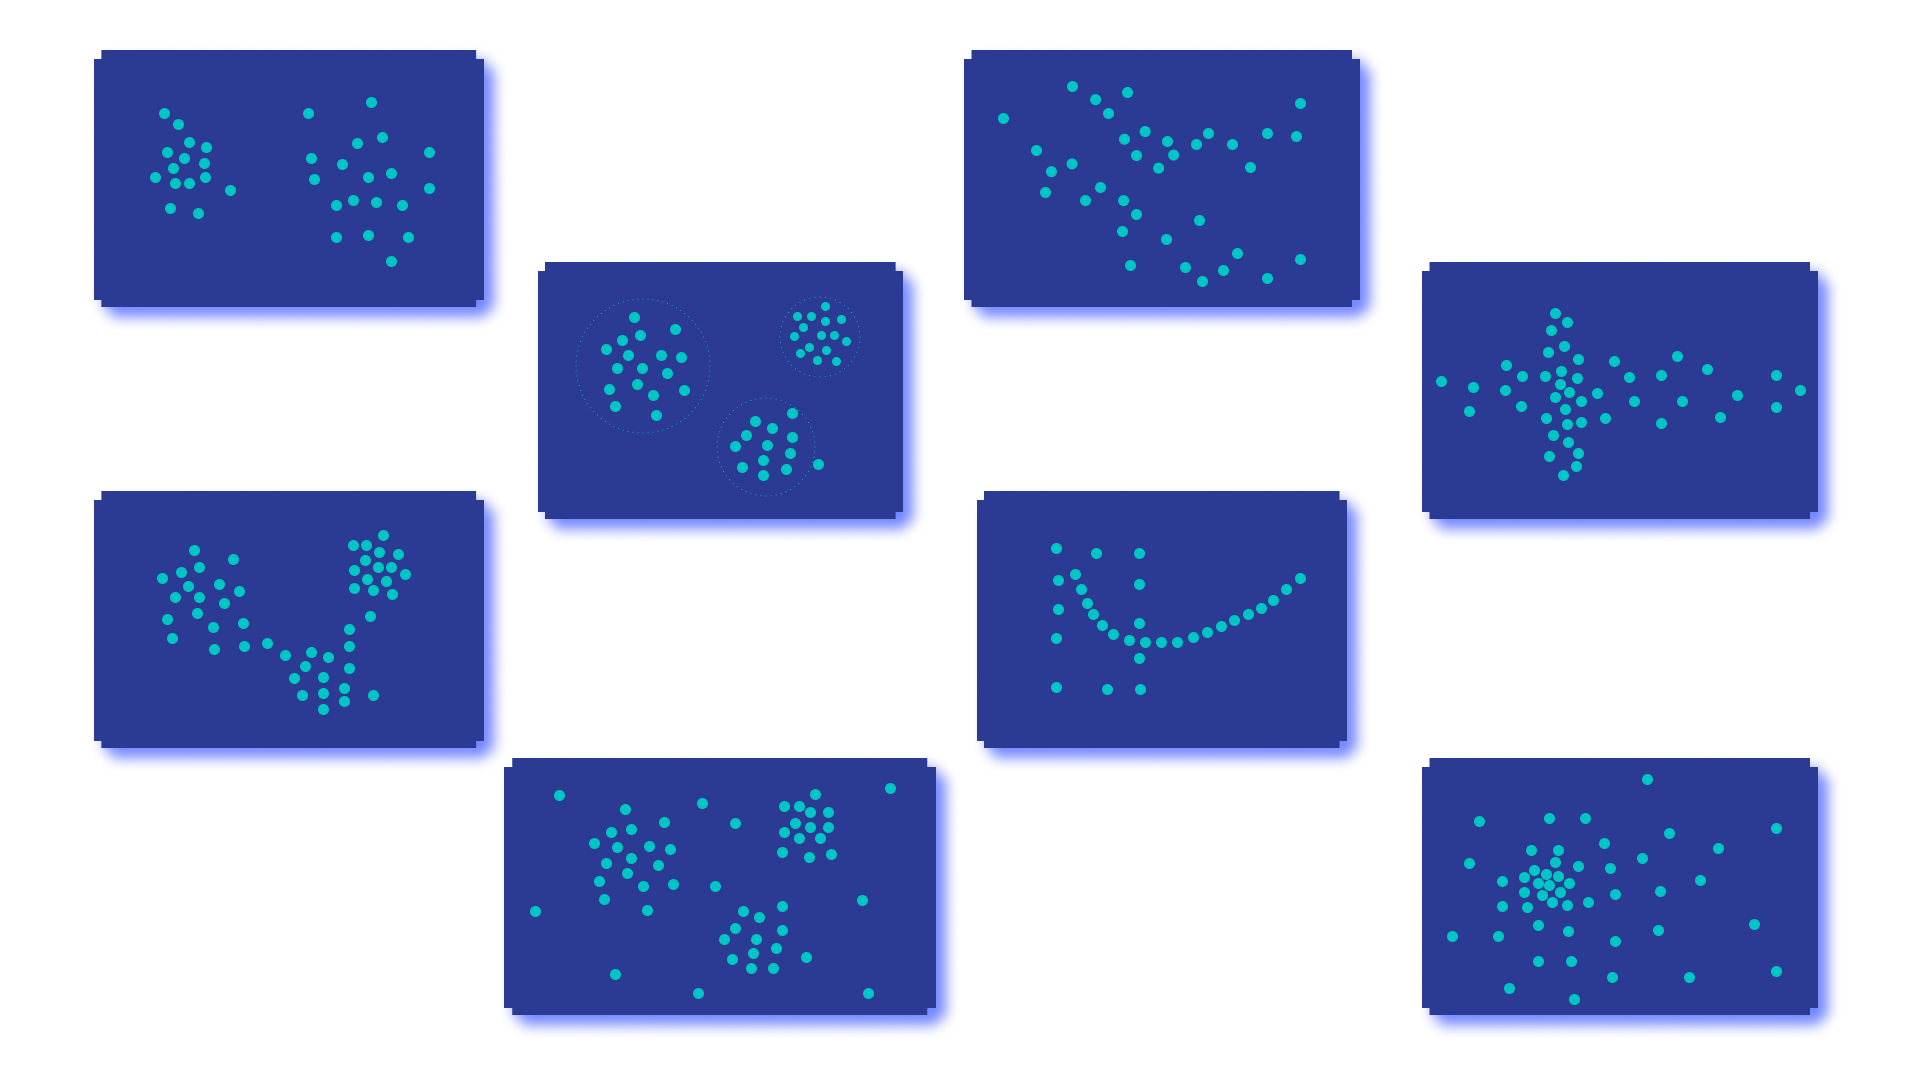

# Сложности такой постановки

Такая постановка задачи кластеризации несколько размыта. Существует понятие корректности постановки задачи по Адамару.

Задача поставлена корректно по Адамару, если

* Решение этой задачи существует
* Решение этой задачи единственно
* Решение этой задачи непрерывно зависит от исходных данных (то есть если мы немного изменим начальные данные, то решение изменится несильно)

Очевидно, задача кластеризации поставлена некорректно с точки зрения этого определения.

**1) Существование (нетривиального) решения**

При решении задачи кластеризации зачастую мы работаем с высокоразмерными данными, которые не можем проанализировать визуально или каким-то еще обзорным способом. Ровно по этой причине мы и хотим решить эту задачу - в результате ее решения мы получаем некоторое конструктивное описание имеющихся данных. Приступая к решению задачи, мы делаем важное предположение о существовании той самой кластерной структуры, которую мы намереваемся выделить.

Но никто не обещает нам сам факт существовании кластерной структуры. Вполне возможно, что имеющиеся данные выбраны из одного распределения, а реального разделения на кластеры просто нет. В этом случае обнаруженная кластерная структура будет либо тривиальной, либо не отражающей реальной структуры данных.

**2) Единственность решения**

В случае, когда некоторая кластерная структура в данных объективно существует, она может быть неоднозначной. Приведем пример.


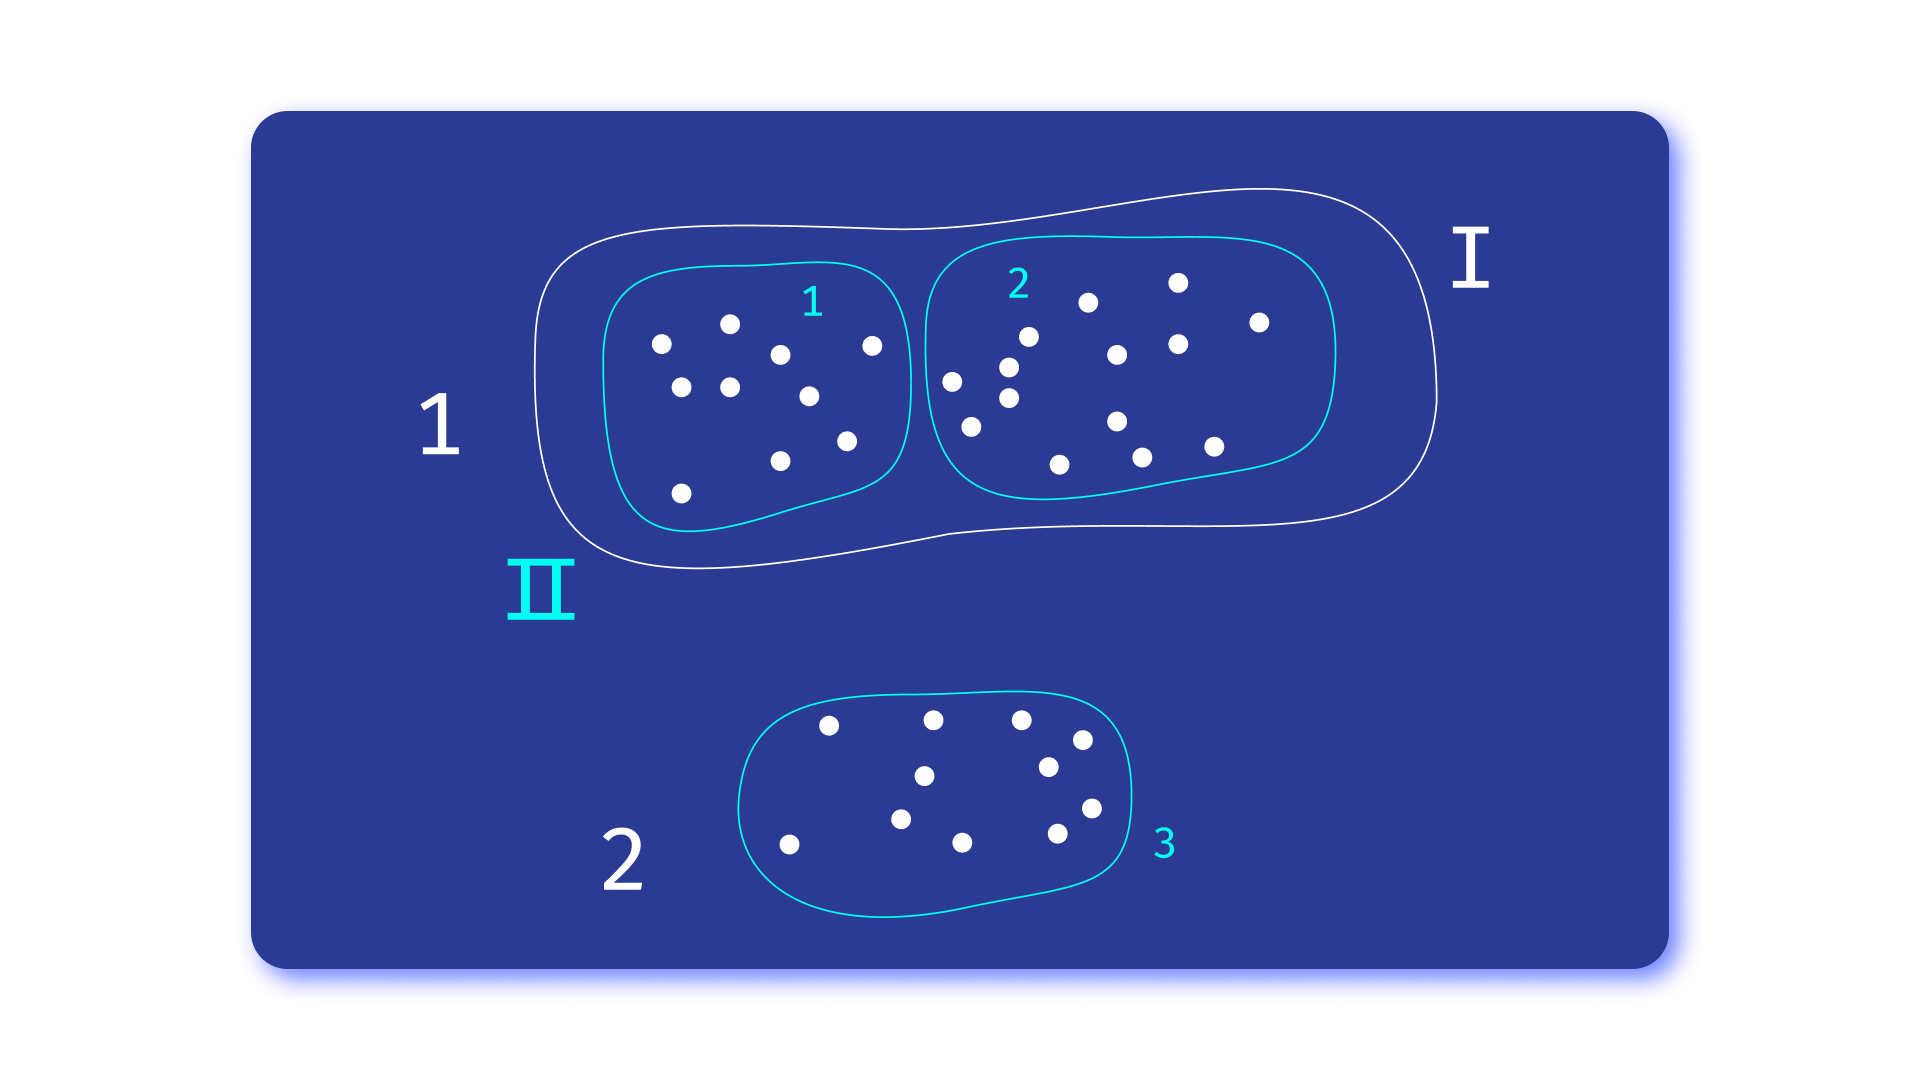

Все это наводит нас на мысль о том, что задача, которая стоит перед нами, непроста в первую очередь в силу своей неоднозначности. Тем не менее существуют довольно эффективные методы решения этой задачи. Мы познакомимся с ними.

# Метод K-Means (K средних)

Один из самых популярных методов кластеризации называется **k-means**. Он повсеместно используется для решения задачи кластеризации. *Алгоритм k средних* является частным случаем более общего **EM-алгоритма**.


Рассмотрим сначала алгоритм K-means, а затем увидим, как он обобщается, превратив его в EM-алгоритм. Для того чтобы обсудить этот алгоритм, введем понятие *центра кластера*.

**Центр кластера** - это точка, представляющая собой центр масс области, отведенной кластеру. Проще говоря, это его геометрическая середина. Если мы знаем набор точек, принадлежащий кластеру, определить его центр очень просто: нужно всего лишь посчитать среднее по всем точкам для каждой координаты. Такой набор координат и задаст нам оценку центра кластера.

Итак, как же выглядит **алгоритм k-средних**?

В качестве предположения будем считать, что число кластеров в имеющемся датасете нам заранее известно и равно оно $K$.

Заметим, что искомые кластеры можно однозначно задать в виде $K$ точек в пространстве признаков.
> Зададимся начальным приближением центров искомых кластеров $\Theta_0 = (\theta_1^0 ... \theta_k^0)$

> Пока не достигнута сходимость:
>> 1.Посчитаем, каким кластерам принадлежат точки имеющегося датасета при условии текущего приближения $G_i$: $g_j^i := \arg\min\limits_{p = 1 ... k}(\rho(Θ_p^{i-1}, x_j))$ для всех $x_j$ из датасета.
>
>> 2. На основе посчитанного распределения датасета по кластерам G = ($g_1^i ... g_N^i $) пересчитаем новые центры кластеров $\Theta_i = (\theta_1^i ... \theta_k^i)$.

**Замечание:** Важно заранее сказать, что мы понимаем под сходимостью. Мы будем понимать под сходимостью ситуацию, при которой каждый следующий шаг приводит к крайне незначительному изменению нашей оценки центров кластеров. В следующем примере мы увидим, что с некоторого шага эта оценка вообще не будет меняться. В реальности во многих алгоритмах мы задаемся некоторым маленьким числом $ϵ$, а затем сравниваем изменение оценок с этим значением. Если оказалось, что изменение оценок из шага в шаг полуается меньше, чем $ϵ$, мы говорим, что достигли сходимости.

Рассмотрим работу этого алгоритма на примере.

Для начала рассмотрим всего 2 кластера, к тому же демонстрировать работу алгоритма мы будем в двумерном случае (то есть, когда вектор признакового описания двумерный).

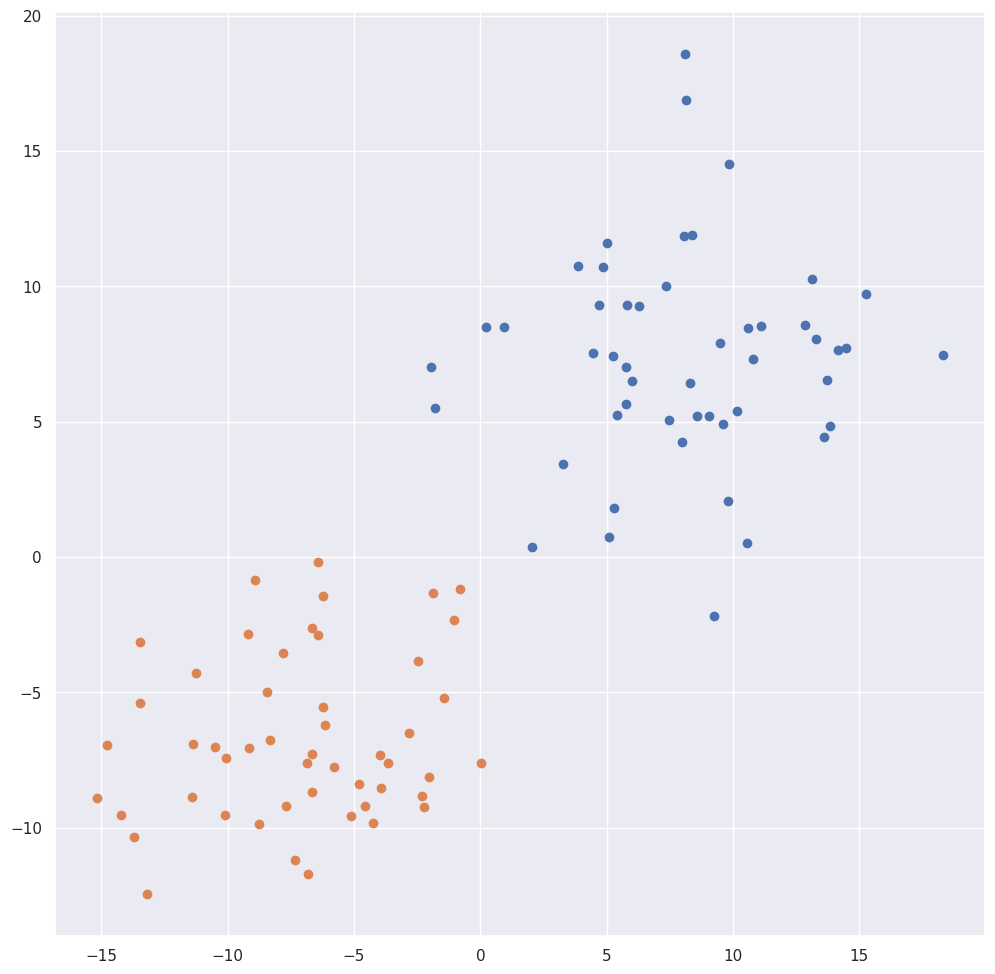

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

a_x = 3.5 * np.random.randn(50) + 7
a_y = 3.5 * np.random.randn(50) + 7
b_x = 3.5 * np.random.randn(50) - 7
b_y = 3.5 * np.random.randn(50) - 7

plt.figure(figsize=(12, 12))
plt.scatter(a_x, a_y)
plt.scatter(b_x, b_y)

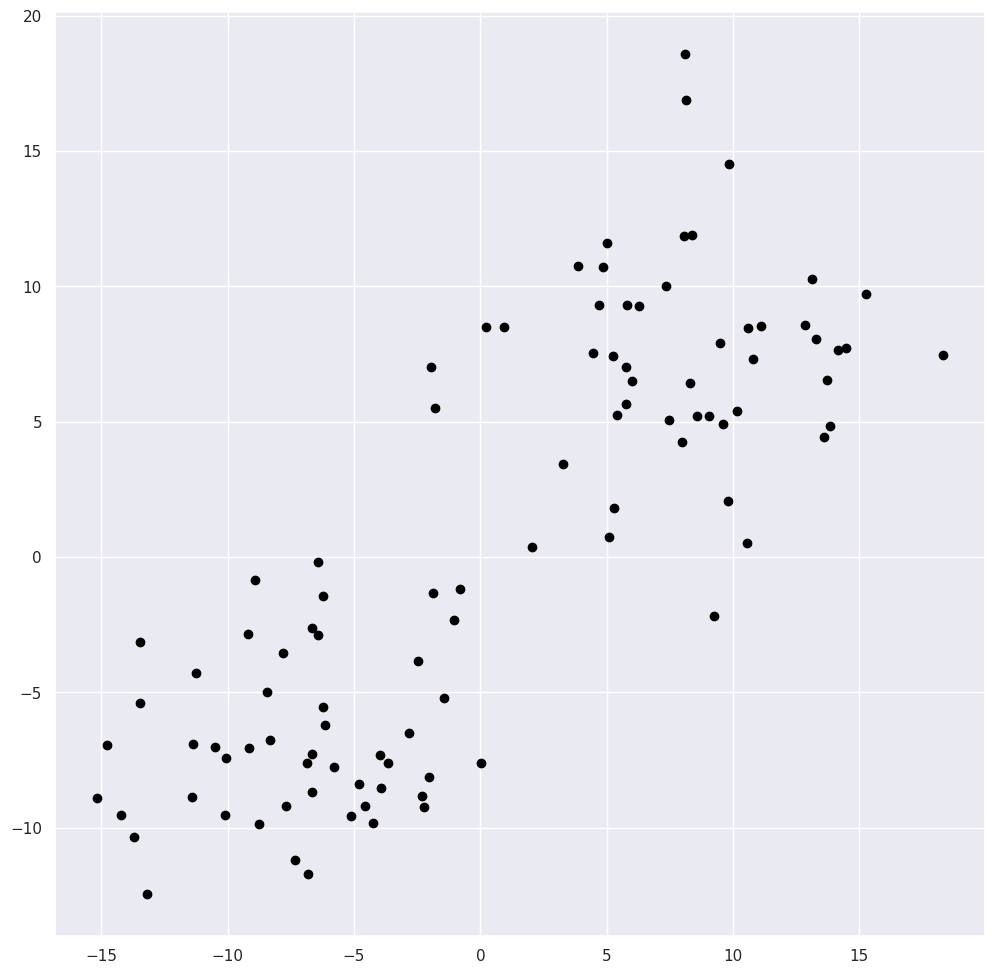

In [ ]:
# Зададим функцию расстояния
dist = lambda x1, y1, x2, y2: np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Напишем класс "точка"
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def count_distance(self, p):
        return dist(self.x, self.y, p.x, p.y)

    def set_cluster(self, cluster):
        self.cluster = cluster

    def draw(self, color):
        plt.scatter([self.x], [self.y], c=color)


# Объединим все точки в единый список без заполнения информации о метке объектов
points = [point(a_x[i], a_y[i]) for i in range(len(a_x))] + [
    point(b_x[i], b_y[i]) for i in range(len(b_x))
]

plt.figure(figsize=(12, 12))
for i in range(len(points)):
    points[i].draw("black")

In [ ]:
# Напишем функцию одного шага
def step(points, cluster_center_1, cluster_center_2):
    for i in range(len(points)):
        distance_1 = points[i].count_distance(cluster_center_1)
        distance_2 = points[i].count_distance(cluster_center_2)
        if distance_1 < distance_2:
            points[i].set_cluster(1)
        else:
            points[i].set_cluster(2)
    return points

In [ ]:
# Функция пересчета центра кластера

def find_centers(points):
    cl1 = []
    cl2 = []

    for i in range(len(points)):
        if points[i].cluster == 1:
            cl1.append(points[i])
        else:
            cl2.append(points[i])

    cluster_center_1 = point(np.mean([p.x for p in cl1]),
                             np.mean([p.y for p in cl1]))

    cluster_center_2 = point(np.mean([p.x for p in cl2]),
                             np.mean([p.y for p in cl2]))

    return cluster_center_1, cluster_center_2

In [ ]:
# Одна итерация цикла
# Функция update работает в одном из двух режимов: в нулевом режиме она пересчитывает новое распределение точек по кластерам,
# исходя из данных центров, а в первом - пересчитывает новые центры по заданным кластерам
# Эти режимы кодируются входной переменной rjm, принимающей одно из двух значений - 0 или 1. На выходе мы изменяем значение этой переменной на противоположное

def update(points, cluster_center_1, cluster_center_2, rjm):
    if rjm:
        c1 = cluster_center_1
        c2 = cluster_center_2
        cluster_center_1, cluster_center_2 = find_centers(points)
        plt.arrow(c1.x, c1.y, cluster_center_1.x - c1.x, cluster_center_1.y - c1.y, color='black')
        plt.arrow(c2.x, c2.y, cluster_center_2.x - c2.x, cluster_center_2.y - c2.y, color='black')
    else:
        points = step(points, cluster_center_1, cluster_center_2)
    for p in points:
        p.draw('r' if p.cluster == 1 else 'b')

    cluster_center_1.draw('m')
    cluster_center_2.draw('y')

    return points, cluster_center_1, cluster_center_2, 1-rjm

На этом моменте возникает закономерный вопрос - по какому принципу задаются начальные приближения центров кластеров?

Вообще говоря, существуют некоторые *эвристики*, которые помогают делать этот выбор не совсем случайно. Но мы не будем углубляться в подробное обсуждение этого вопроса, и, следуя классическому алгоритму, выберем начальные приближения случайным образом. Например, (-15,10) и (15, -10).

In [ ]:
c1 = point(-15,10)
c2 = point(15,-10)
rjm = 0

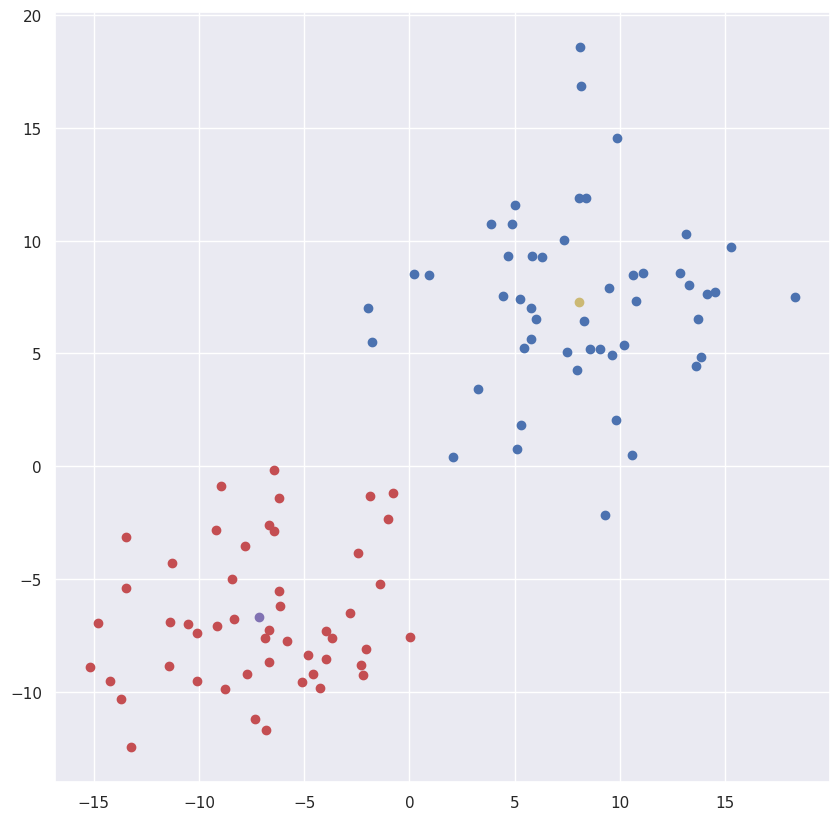

In [ ]:
"""
Функция update делает и отрисовывает всего один шаг работы алгоритма!
Для наблюдения работы алгоритма требуется исполнить данную ячейку (и все ячейки с функцией update) несколько раз!
"""
plt.figure(figsize=(10,10))
points, c1, c2, rjm = update(points, c1, c2, rjm)

## Обобщим на случай нескольких кластеров

In [ ]:
import collections
from collections import defaultdict
def step(points, centers):
    for i in range(len(points)):
      distances = [points[i].count_distance(centers[k]) for k in centers.keys()]
      cluster = np.argmin(distances) + 1
      points[i].set_cluster(cluster)
    return points

def find_centers(points):
    clusters = defaultdict(list)
    centers = {}
    for i in range(len(points)):
      clusters[points[i].cluster].append(points[i])
    for k in clusters.keys():
      centers[k] = point(np.mean([p.x for p in clusters[k]]),
                         np.mean([p.y for p in clusters[k]]))
    return centers

def update(points, centers, rjm, colors_clusters, colors_centers):
    if rjm:
        c = centers
        centers = find_centers(points)
        for k in centers.keys():
            plt.arrow(c[k].x, c[k].y, centers[k].x - c[k].x, centers[k].y - c[k].y, color='black')
    else:
        points = step(points, centers)
    for p in points:
        p.draw(colors_clusters[p.cluster - 1])

    for i,k in enumerate(centers.keys()):
      centers[k].draw(colors_centers[i])
    return points, centers, 1-rjm

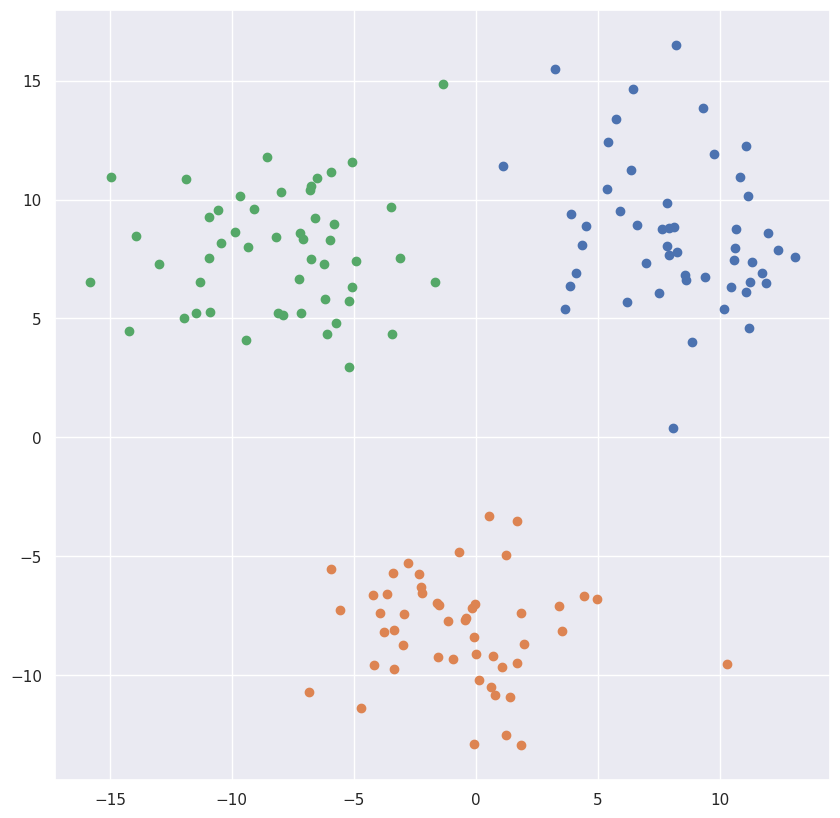

In [ ]:
from matplotlib import pyplot  as plt
import numpy as np



a_x = 3.*np.random.randn(50) + 8
a_y = 3.*np.random.randn(50) + 8
b_x = 3.*np.random.randn(50)
b_y = 3.*np.random.randn(50) - 8
c_x = 3.*np.random.randn(50) - 8
c_y = 3.*np.random.randn(50) + 8

plt.figure(figsize=(10,10))
plt.scatter(a_x, a_y)
plt.scatter(b_x, b_y)
plt.scatter(c_x, c_y)

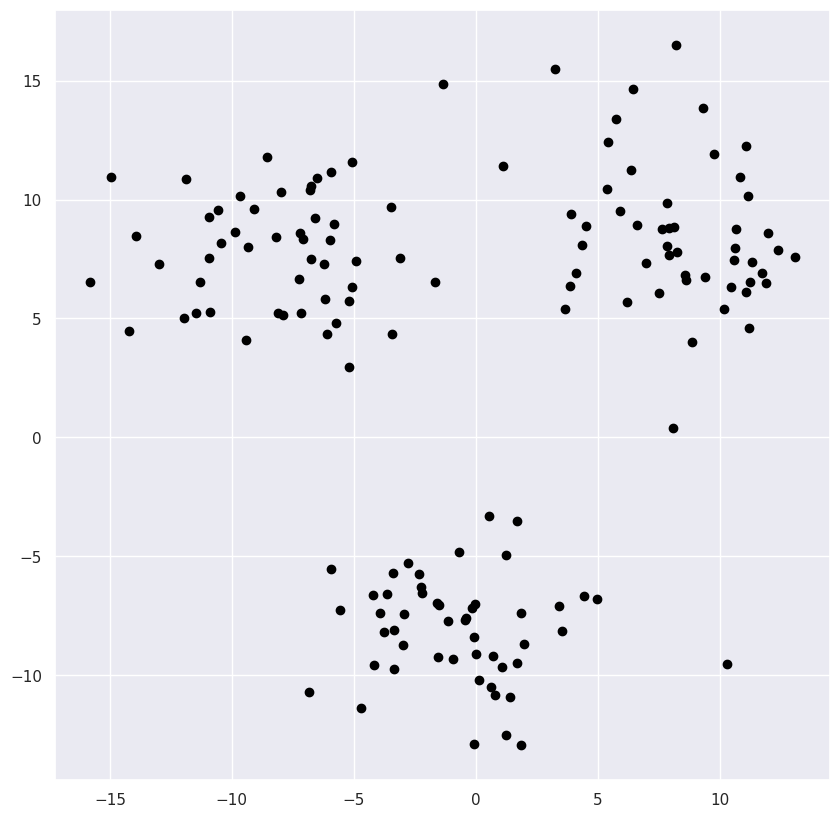

In [ ]:
points = (
    [point(a_x[i], a_y[i]) for i in range(len(a_x))]
    + [point(b_x[i], b_y[i]) for i in range(len(b_x))]
    + [point(c_x[i], c_y[i]) for i in range(len(c_x))]
)

plt.figure(figsize=(10, 10))
for i in range(len(points)):
    points[i].draw("black")

In [ ]:
centers = {1: point(-15,-15),2: point(15,-15),3: point(0,15)}
colors_clusters = ['g', 'b', 'r']
colors_centers = ['y', 'm', '#000000']
rjm = 0

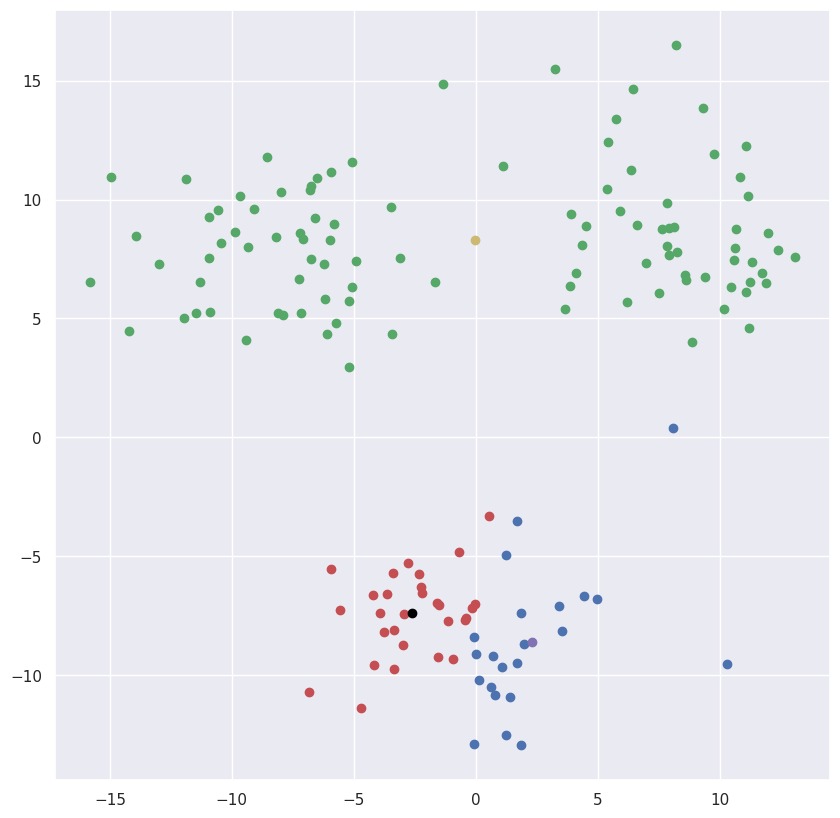

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

## А если выбрать другие стартовые приближения?

In [ ]:
centers = {1: point(-1, 20),2: point(15,5),3: point(-15,-15)}
colors_clusters = ['g', 'b', 'r']
colors_centers = ['y', 'm', '#000000']
rjm = 0

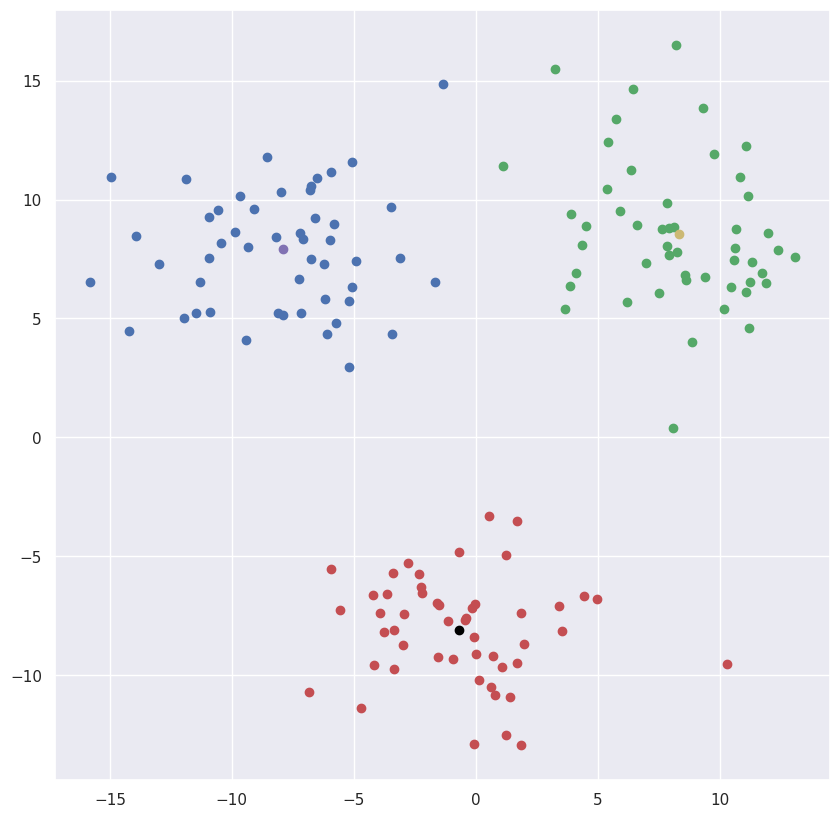

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

А что если мы выберем неверное число кластеров?

In [ ]:
# 2 класстера
centers = {1: point(-1, 20),2: point(15,5)}
colors_clusters = ['g', 'b']
colors_centers = ['y', 'm']
rjm = 0

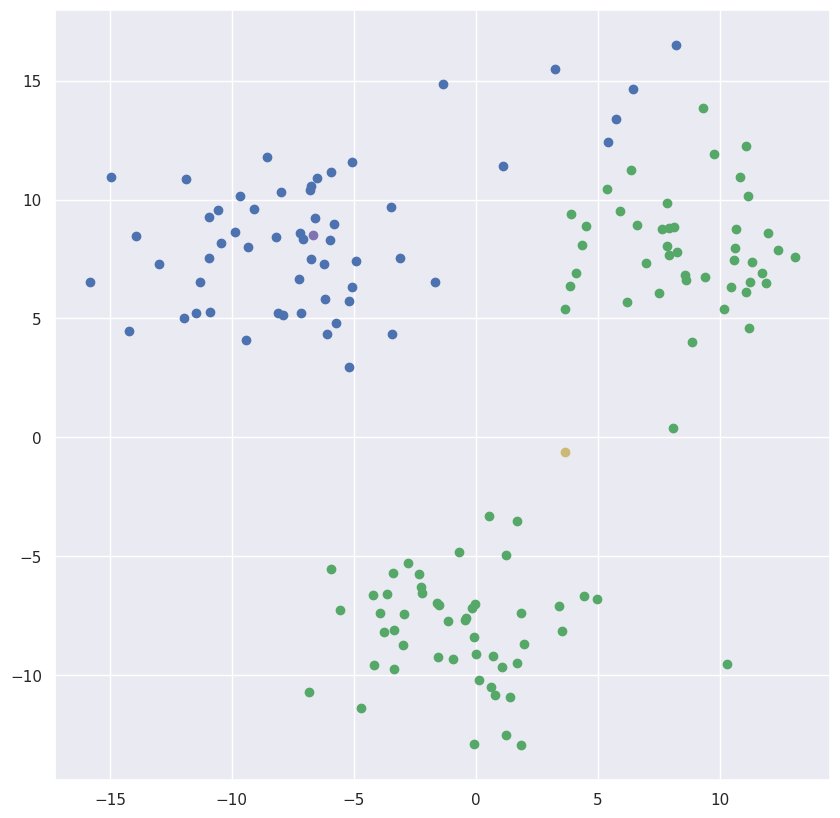

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

In [ ]:
# 4 кластера

centers = {1: point(-1, 20),2: point(15,5), 3: point(-10, -10), 4: point(10,10)}
colors_clusters = ['g', 'b', 'r', '#ff8243']
colors_centers = ['y', 'm', '#000000', "#8b00ff"]
rjm = 0

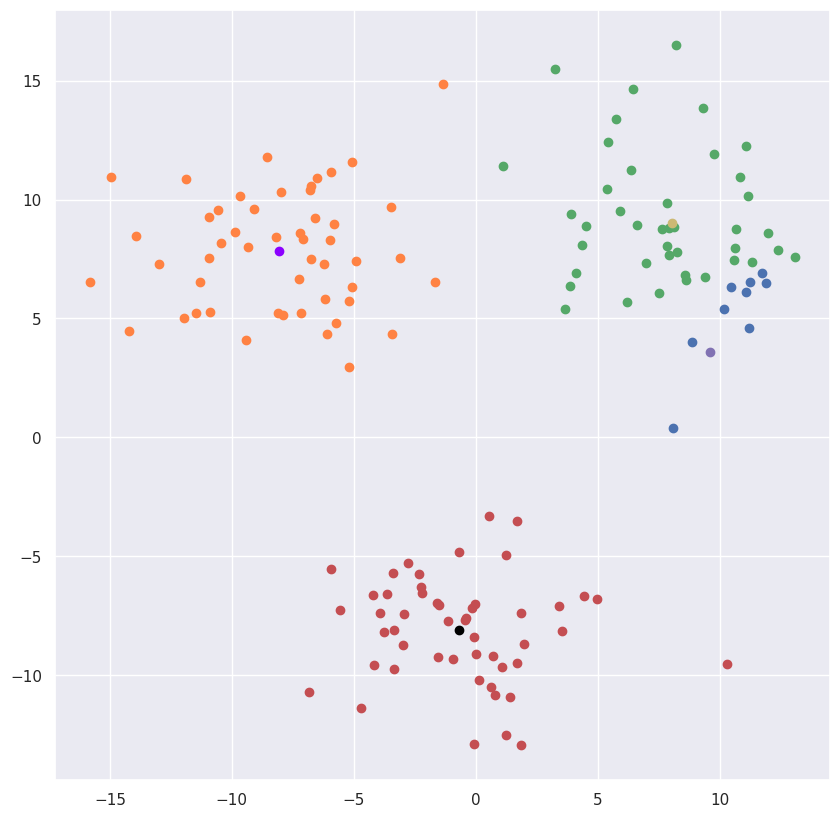

In [ ]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

# Выводы:

1. Алгоритм очень сильно зависит от начального приближения центров кластеров.
2. При неверном заданном числе кластеров мы получаем формально корректный результат, который может быть не вполне правильным отображением реальности.

## Реализация в sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = [[p.x, p.y] for p in points]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

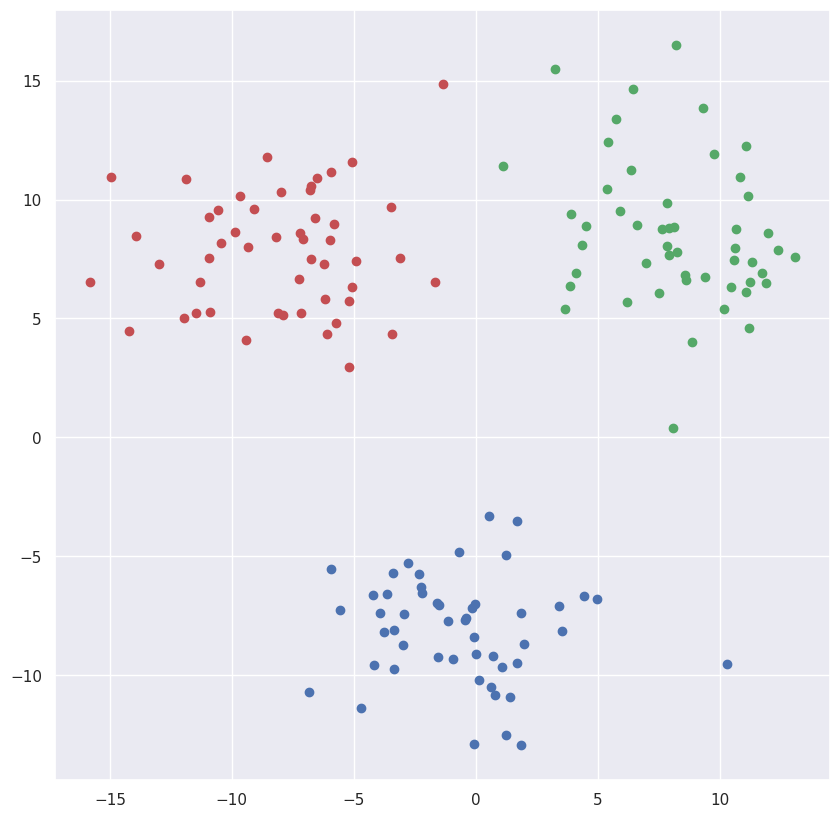

In [ ]:
plt.figure(figsize=(10,10))
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

Что если поставить другое число кластеров?

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


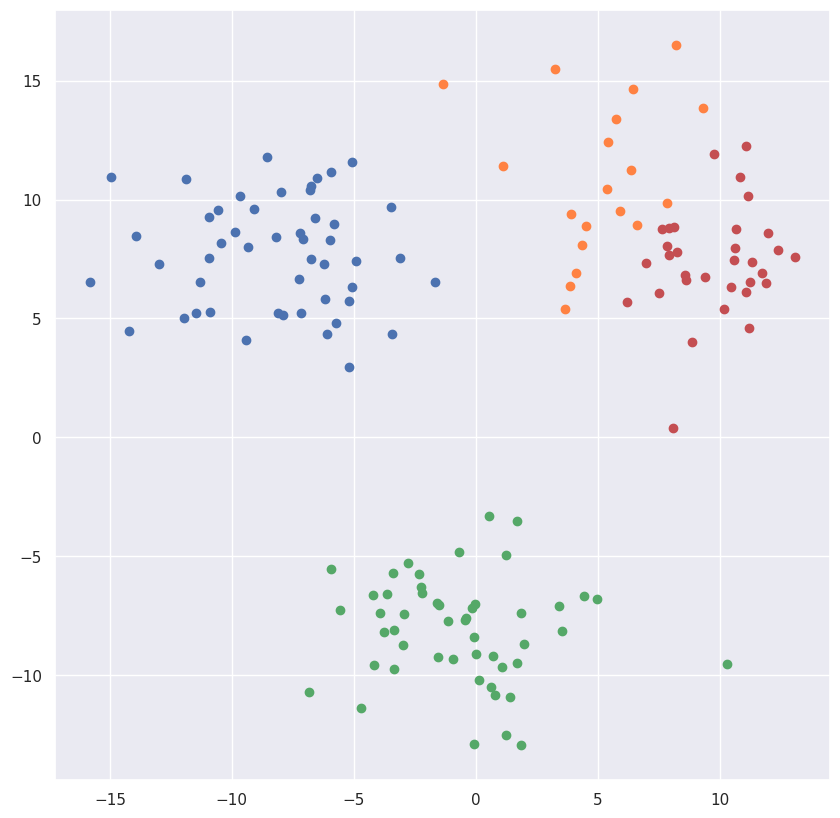

In [ ]:
plt.figure(figsize=(10,10))

colors_clusters = ['g', 'b', 'r', '#ff8243']
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


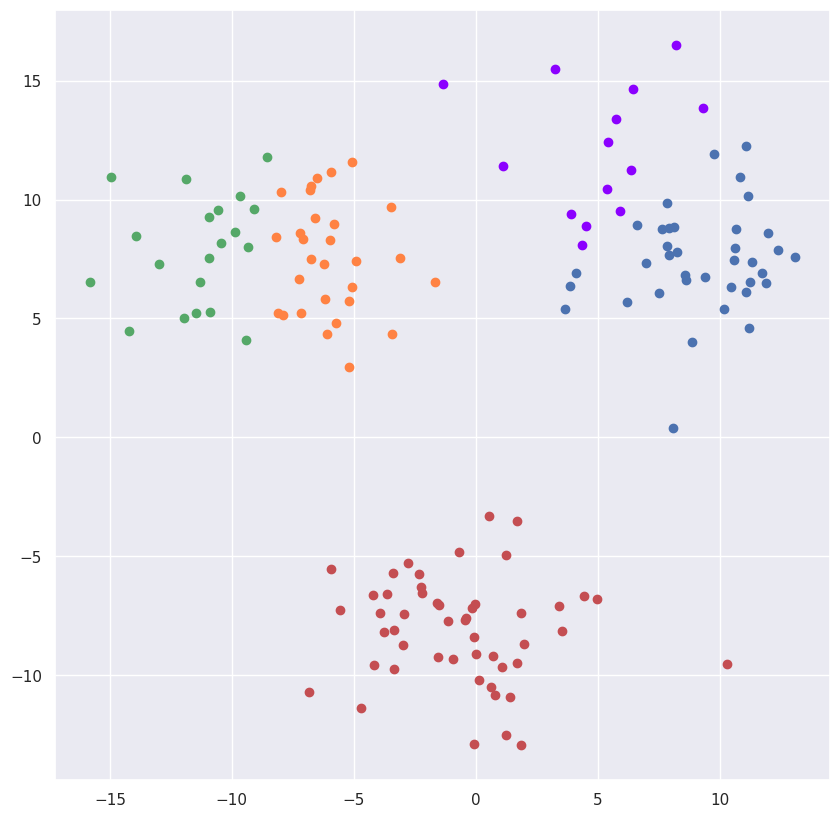

In [ ]:
plt.figure(figsize=(10,10))

kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
colors_clusters = ['g', 'b', 'r', '#ff8243', "#8b00ff"]
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

______________
> **Справка: EM-алгоритм**
>
> EM-алгоритм (Expectation-Maximization) - это алгоритм оценки оптимальных параметров некоторой модели $Θ$ по набору наблюдаемых переменных $x$ при помощи введения вектора некоторых скрытых переменных $G$ (то есть тех переменных, которые мы не можем непосредственно пронаблюдать, но можем некоторым образом оценить).
>
> Проведем аналогию с алгоритмом *k-means*: оптимальные параметры $Θ$ задавали нам распределение точек по кластерам. Именно они и были искомыми метками кластеров. Скрытые переменные $G$ задавали нам центры кластеров. Мы не могли пронаблюдать их напрямую, но могли оценить их при текущем приближении $Θ$. Наблюдаемые переменные представляли собой координаты точек, которые были в нашем датасете.
> EM-алгоритм, как и алгоритм k-means, состоит из двух повторяющихся итеративно шагов:
> 0. Зададим начальное приближение параметров $Θ_0$
>
>>Пока не будет достигнута сходимость:
>>>1.Expectation-шаг: посчитаем ожидаемые значения скрытых переменных $G_i$ при условии текущего приближения $Θ_{i-1}$
>>>2. Maximization-шаг: решим задачу максимизации правдоподобия наблюдаемых значений $x$ при условии скрытых переменных $G_i$. То есть $Θ_i = argmax(P(x|G_i, Θ))$

Алгоритм прекратит свою работу, когда изменения вектора параметров $Θ$ на некотором шаге станут несущественны.
________________________________

**Замечание:** Нужно отметить, что K-Means способен обнаруживать лишь достаточно простые кластерные структуры. Например, с определением кольцевых кластеров у него возникнут проблемы, и потребуется использовать другие методы кластеризации.

# Как бороться с обозначенными проблемами?
1. Мультистарт. Мы можем запустить алгоритм много раз с разными начальными приближениями центров кластеров, а затем выбрать то решение, где сумма расстояний от каждого объекта до центра масс его кластера - наименьшая.

2. Иерархическая кластеризация

# Иерархическая кластеризация
______________________________________
Иерархическая кластеризация предполагает два различных глобальных подхода - аггломеративная иерархическая кластеризация и дивизионная. Отличия между ними состоят в том, что аггломеративная кластеризация предполагает последовательное слияние различных кластеров, в то время как дивизионная - последовательное разбиение. В этой лекции мы будем обсуждать аггломеративную кластеризацию.
______________________________________


Идея иерархической кластеризации состоит в последовательном проведении некоторой итерационной процедуры (то есть процедуры, состоящей из некоторого количества повторяющихся шагов), позволяющей на основе известного разбиения на $N$ кластеров провести слияние наиболее близких из них (или же наоборот, разбить один из кластеров на 2 разных) получив разбиение на $N-1$ кластер (или же на $N+1$). Таким образом, мы получим последовательность разбиений на разное число кластеров нашей выборки и выберем наилучшее из них.

# Алгоритм Ланса-Уильямса

Алгоритм, позволяющий проводить последовательное слияние кластеров при условии, что мы имеем некоторую функцию, позволяющую измерить расстояние между двумя кластерами. Назовем эту функцию $R(U,V)$, где $U$ и $V$ - некоторые кластеры.

> 1. Пусть сначала все кластеры одноэлементные. То есть каждый объект нашей выборки представляет собой в начальном приближении отдельный кластер.
> 2. Повторим слеющий пункт $L-1$ раз, где $L$ - размер нашей выборки:
> 3. Найдем два ближайших кластера в нашей структуре, согласно значению функции $R(U, V)$, и сольем их в один кластер. Обозначим найденную кластерную структуру на данном шаге $t$ как $C_t$,

На выходе этого алгоритма мы получаем последовательность разбиений на кластеры $C_1 ... C_L$, где разбиение $C_1$ - тривиальное разбиение на индивидуальные кластеры, $C_2$ - разбиение на $L-1$ индивидуальный кластер и 1 кластер, содержащий 2 точки и т.д., а $C_L$ - тривиальное разбиение на один единственный кластер, содержащий все объекты.

Для удобства визуализации такого варианта кластеризации часто используют специальную диаграмму, называемую **дендрограммой**.

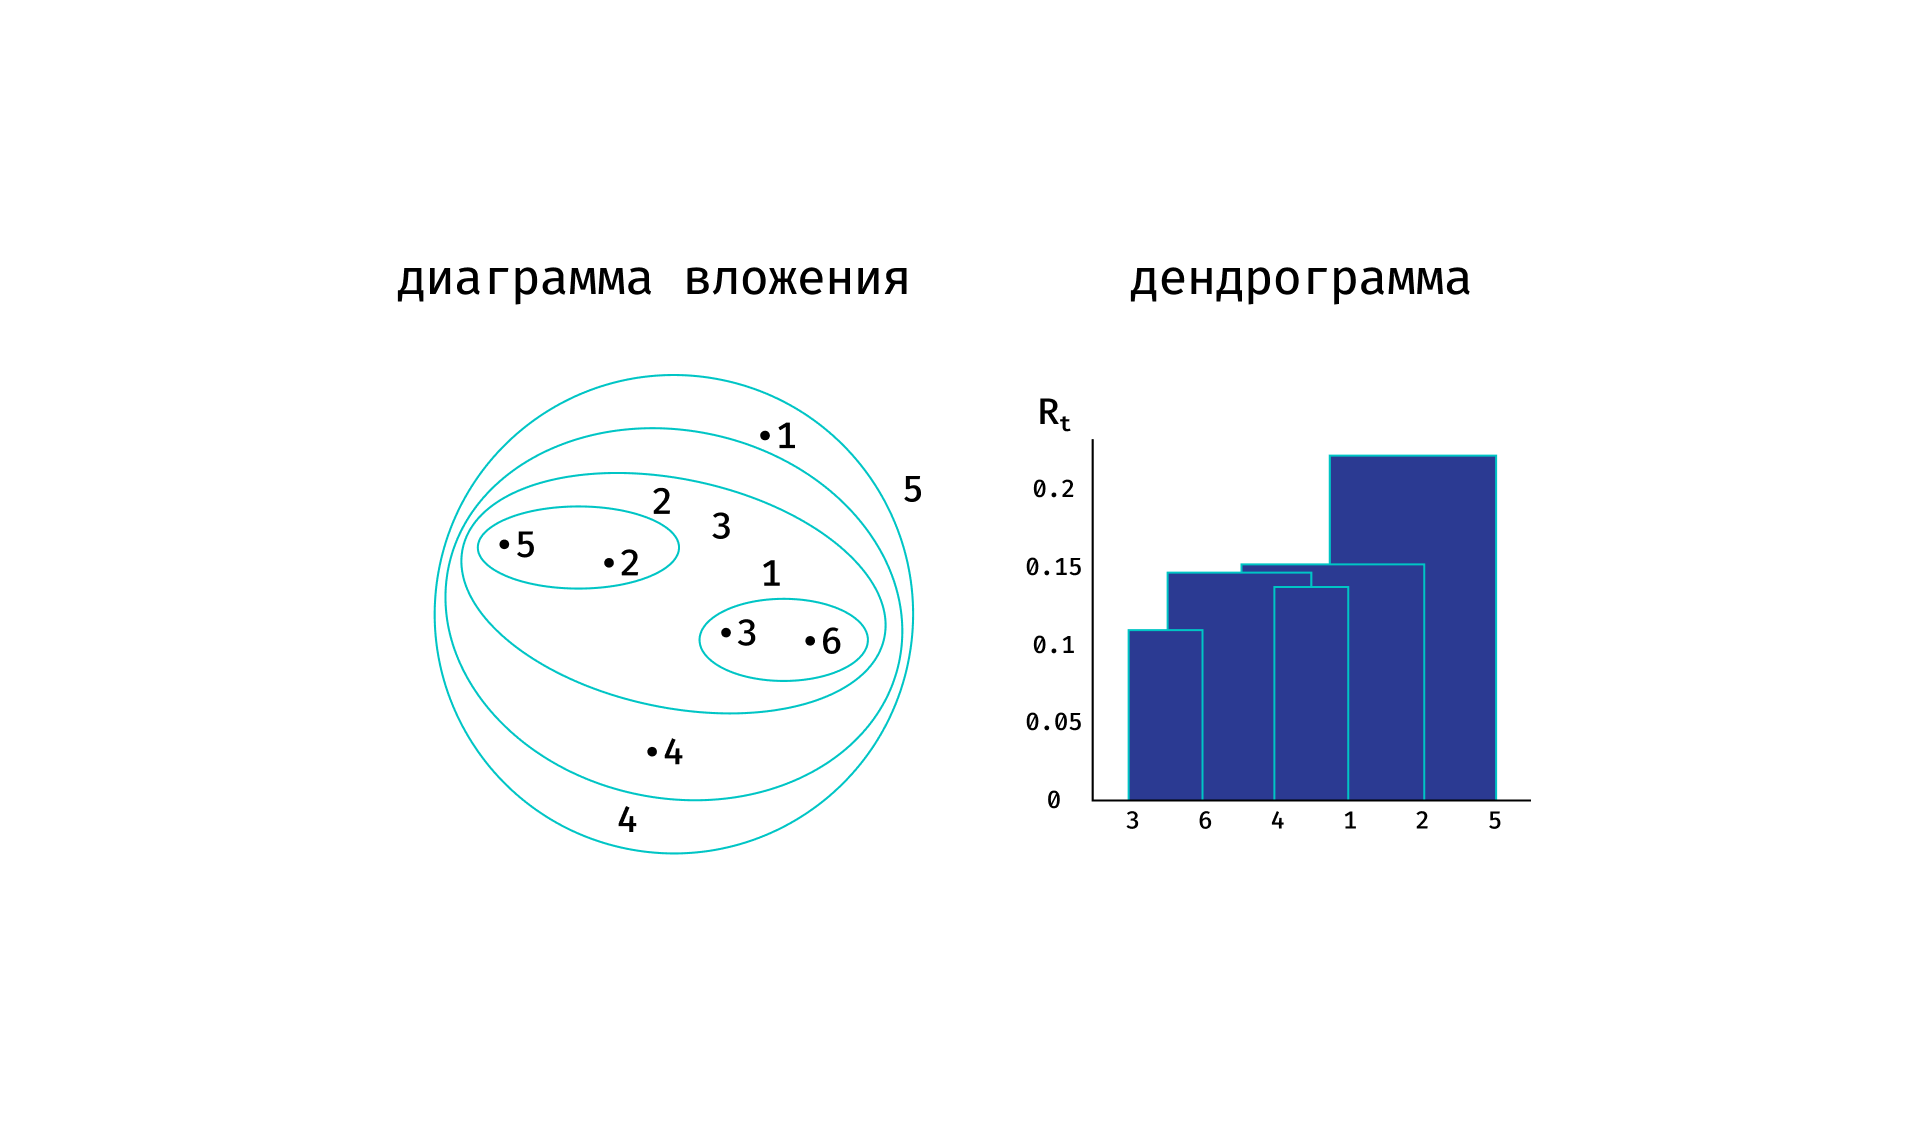

# Формула Ланса-Уильямса

Как все же измерить расстояние между кластерами?

На самом деле существует довольно много различных вариантов.
Например,
* Расстояние ближайшего соседа. $R(U, V)$ = $\min\limits_{x \in U, y \in V}(\rho(x,y))$
* Расстояние дальнего соседа. $R(U, V)$ = $\max\limits_{x \in U, y \in V}(\rho(x,y))$
* Среднее групповое расстояние. $R(U, V)$ = $\frac{1}{N}\sum\limits_{x \in U, y \in V}(\rho(x,y))$

Выбрать наиболее подходящий для нашей задачи вариант можно, исходя из эвристик, которые мы можем сформировать, учитывая наше знание предметной области или особенностей задачи, а также попробовав несколько вариантов и определив, какая кластеризация минимизирует сумму расстояний от каждого объекта до центра его кластера.

Существует формула, позволяющая в общем виде описать все эти и многие другие способы подсчета расстояния между кластерами.

Будем считать, что кластер $W$ = $U \bigcup V$. Будем также считать, что мы знаем расстояния между кластерами $R(U, S)$ и $R(V, S)$.

Тогда $$R(W, S) = α_U\times R(U,S) + α_V\times R(V,S) + β\times R(U,V) + γ\times |R(U,S) - R(V,S)|$$

Мы в этой формуле можем выбирать коэффициенты $α_U, α_V, β, γ$

Например, если мы положим $α_U = α_V = \frac{1}{2}, β=0, γ=-\frac{1}{2}$, то мы получим формулу для расстояния ближайшего соседа.
А при наборе коэффициентов $α_U = α_V = \frac{1}{2}, β=0, γ=\frac{1}{2}$ получим расстояние дальнего соседа.

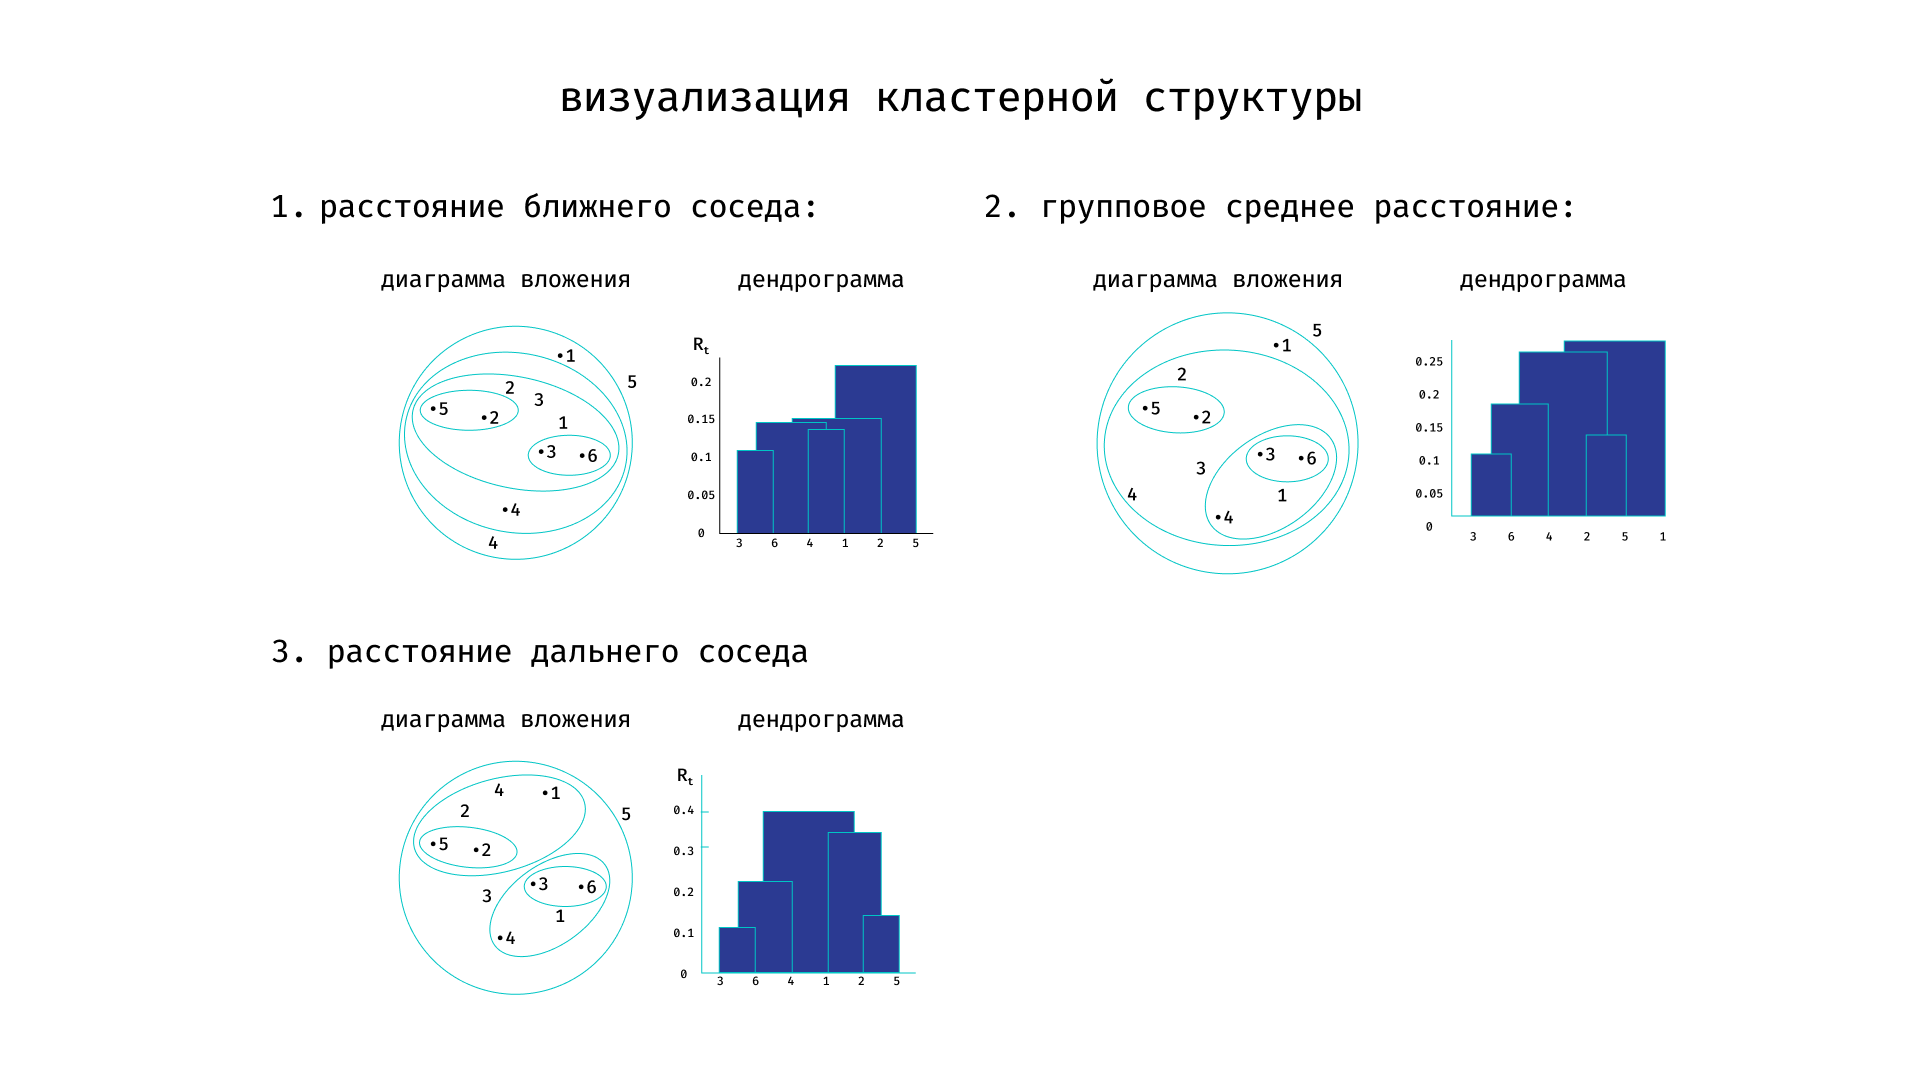

# Реализация в scipy

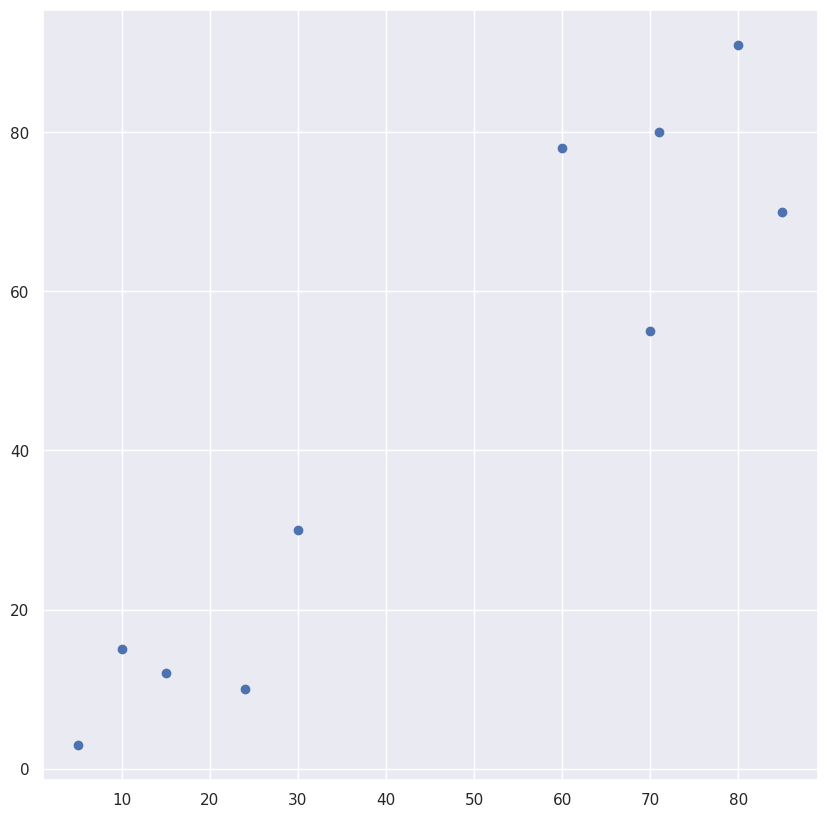

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

plt.scatter(X[:,0],X[:,1])

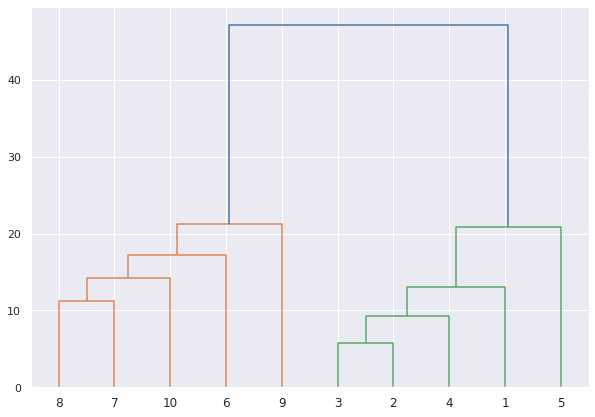

In [ ]:
linked = linkage(X, 'single')
labelList = range(1, len(X)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# Пример
В одной из прошлых лекций мы рассматривали [пример](https://colab.research.google.com/drive/1MhWrDx0RsNrt4DWsk583Xb-CAm6z27s8#scrollTo=UvGIxuvv6ouF) применения линейных моделей регрессии для решения задачи прогнозирования размера вклада клиента банка по характеристикам его дохода.

Этим примером мы показали, что применение линейных моделей имеет смысл в случае, если мы строим индивидуальную модель для каждого из кластеров, формирующих датасет.

Напомню формулировку задачи:

Пусть мы хотим предсказать размер вклада человека в некотором банке по описанию его дохода. Клиенты этого банка делятся на несколько категорий: пенсионеры, семьи с детьми, подростки, бизнесмены и молодые специалисты по машинному обучению.

Датасет можно получить по [ссылке](https://drive.google.com/file/d/1S_R3x8BNebKFZVXyDJDpnglYay_MrEPL/view?usp=sharing).

In [ ]:
import numpy as np
import pandas as pd
X = pd.read_csv('credit.csv')
X

FileNotFoundError: ignored

Напомню, что в этом датасете содержится информация о ежемесячном доходе клиента и его счёте в банке.

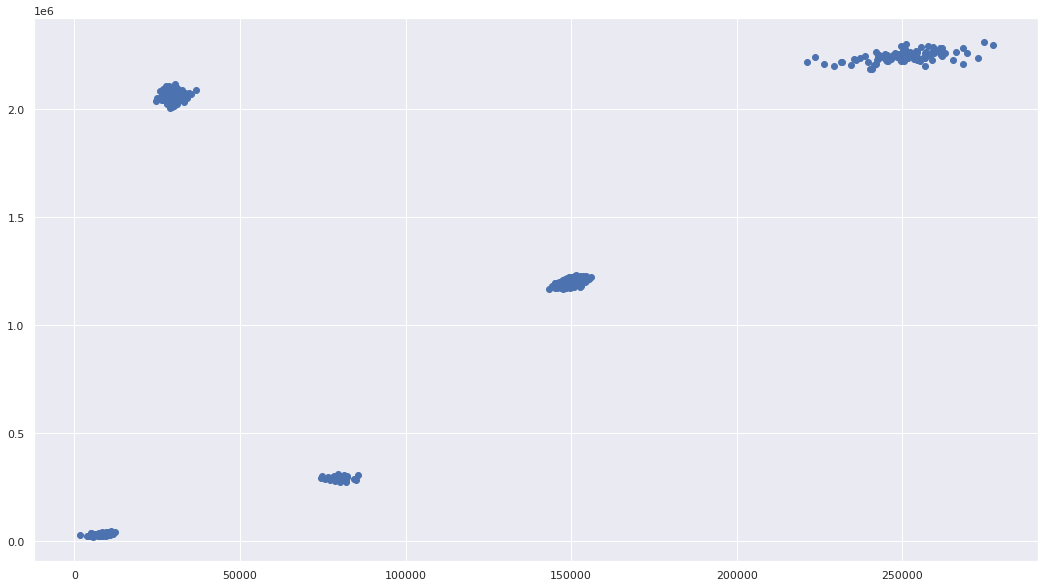

In [ ]:
from matplotlib import pyplot as plt
import seaborn
seaborn.set_theme()

plt.figure(figsize=(18,10))
plt.scatter(X.Income, X.Account)

Заметим, что теперь у нас нет очень удобных меток, которые помогли бы нам обучить свою модель для каждого из классов. То есть наш пример стал более реалистичным. Мы должны придумать что-то, что поможет нам разобраться с этой проблемой. К счастью, теперь мы знаем, что можем воспользоваться алгоритмом кластеризации.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=5,random_state=0).fit(X.Income.values.reshape(-1,1))

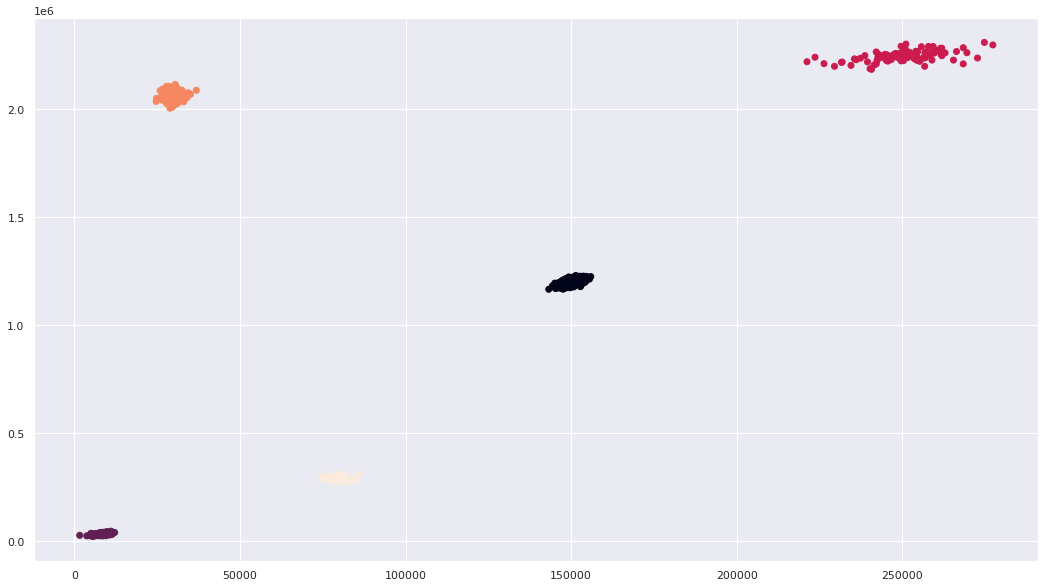

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(X.Income, X.Account, c=kmeans.labels_)

K-Means идеально справился со своей задачей!
Для каждого кластера построим свою линейную регрессию.

In [ ]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [ ]:
from sklearn.linear_model import LinearRegression

X, y = X.Income.values, X.Account.values

x_0, y_0 = X[kmeans.labels_ == 0], y[kmeans.labels_ == 0]
x_1, y_1 = X[kmeans.labels_ == 1], y[kmeans.labels_ == 1]
x_2, y_2 = X[kmeans.labels_ == 2], y[kmeans.labels_ == 2]
x_3, y_3 = X[kmeans.labels_ == 3], y[kmeans.labels_ == 3]
x_4, y_4 = X[kmeans.labels_ == 4], y[kmeans.labels_ == 4]

LR_0 = LinearRegression().fit(x_0.reshape(-1,1), y_0)
LR_1 = LinearRegression().fit(x_1.reshape(-1,1), y_1)
LR_2 = LinearRegression().fit(x_2.reshape(-1,1), y_2)
LR_3 = LinearRegression().fit(x_3.reshape(-1,1), y_3)
LR_4 = LinearRegression().fit(x_4.reshape(-1,1), y_4)

Изобразим полученный результат

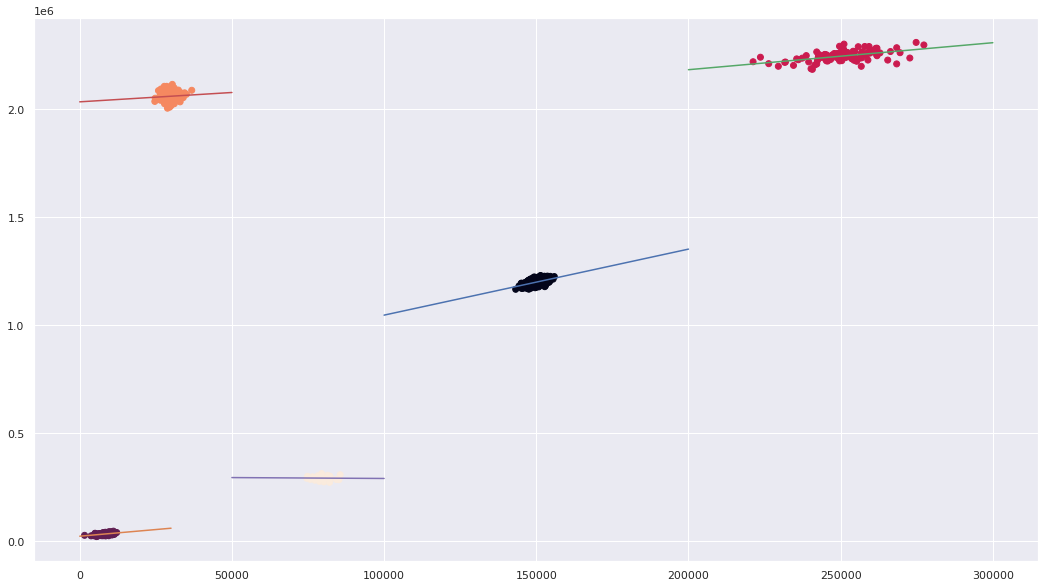

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, c=kmeans.labels_)

plt.plot([100_000,200_000], [LR_0.predict([[100_000]]), LR_0.predict([[200_000]])])
plt.plot([0,30_000], [LR_1.predict([[0]]), LR_1.predict([[30_000]])])
plt.plot([200_000,300_000], [LR_2.predict([[200_000]]), LR_2.predict([[300_000]])])
plt.plot([0,50_000], [LR_3.predict([[0]]), LR_3.predict([[50_000]])])
plt.plot([50_000,100_000], [LR_4.predict([[50_000]]), LR_4.predict([[100_000]])])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f"r2_score cluster 0: {r2_score(y_0, LR_0.predict(x_0.reshape(-1,1)))}")
print(f"r2_score cluster 1: {r2_score(y_1, LR_1.predict(x_1.reshape(-1,1)))}")
print(f"r2_score cluster 2: {r2_score(y_2, LR_2.predict(x_2.reshape(-1,1)))}")
print(f"r2_score cluster 3: {r2_score(y_3, LR_3.predict(x_3.reshape(-1,1)))}")
print(f"r2_score cluster 4: {r2_score(y_4, LR_4.predict(x_4.reshape(-1,1)))}")

r2_score cluster 0: 0.2747806800970829
r2_score cluster 1: 0.24097422328004658
r2_score cluster 2: 0.28099320642424697
r2_score cluster 3: 0.006983387523667006
r2_score cluster 4: 0.0006180165841759289
